In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('WeatherDataM.csv')



In [ ]:
df.head()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83


In [ ]:
df.describe()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
count,50.000000,50.000000,50.000000,50.000000
mean,13.409111,15.282120,1013.811000,0.661400
std,4.408296,6.066344,3.321718,0.164565
min,6.111111,3.928400,1007.260000,0.360000
25%,9.572222,11.161325,1011.635000,0.532500
50%,13.527778,14.312900,1014.505000,0.665000
75%,17.286111,19.955950,1016.350000,0.815000
max,21.183333,28.368200,1017.740000,0.950000


In [ ]:
col_name = ["Temperature","Wind Speed","Pressure","Humidity"]
df.columns = col_name

In [ ]:
# Step 2: Check for missing data
print("Missing Values:\n", df.isnull().sum())



Missing Values:
 Temperature    0
Wind Speed     0
Pressure       0
Humidity       0
dtype: int64



Correlation Matrix:
              Temperature  Wind Speed  Pressure  Humidity
Temperature     1.000000    0.710133 -0.335435 -0.943471
Wind Speed      0.710133    1.000000 -0.447419 -0.749676
Pressure       -0.335435   -0.447419  1.000000  0.460011
Humidity       -0.943471   -0.749676  0.460011  1.000000


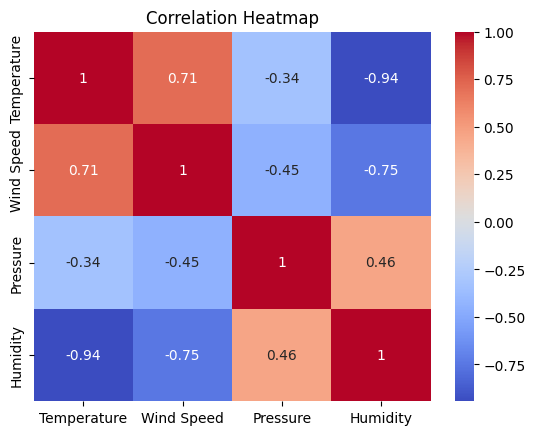

In [ ]:
# Step 4: Check correlations for multicollinearity
print("\nCorrelation Matrix:\n", df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
# Calculate VIF
X = df.drop(columns=['Humidity'])
X = sm.add_constant(X)  # Add a constant for intercept
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif)




Variance Inflation Factor (VIF):
       Variable            VIF
0        const  119862.447694
1  Temperature       2.018901
2   Wind Speed       2.240190
3     Pressure       1.251277


In [ ]:
# Step 6: Split data into training, validation, and test sets
y = df['Humidity']
X = df.drop(columns=['Humidity'])



In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nTraining size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)




Training size: (35, 3)
Validation size: (7, 3)
Test size: (8, 3)


In [ ]:
# Step 7: Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Step 8: Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)



LinearRegression()

In [ ]:
# Step 9: Validate the model
y_val_pred = lr.predict(X_val_scaled)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

print("Validation RMSE:", rmse_val)
print("Validation MAE:", mae_val)



Validation RMSE: 0.06303885996423958
Validation MAE: 0.04301133603937573


In [ ]:
# Step 10: Evaluate on the test set
y_test_pred = lr.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest MSE:", test_mse)
print("Test R2:", test_r2)




Test MSE: 0.0006944853140445541
Test R2: 0.9738853935964444


In [ ]:
# Step 11: Cross-validation
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nCross-Validation MSE (Mean):", -cv_scores.mean())




Cross-Validation MSE (Mean): 0.003014861592709647


In [ ]:
# Step 13: Model Summary using statsmodels
X_train_sm = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nOLS Model Summary:\n")
print(ols_model.summary())


OLS Model Summary:

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     113.3
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           8.52e-17
Time:                        13:26:51   Log-Likelihood:                 56.550
No. Observations:                  35   AIC:                            -105.1
Df Residuals:                      31   BIC:                            -98.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6626      0.00

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')

ModuleNotFoundError: No module named 'pandas'